In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
PATH = 'F:/herbarium-2020_data/nybg2020/train/'
OPEN_DIR = os.listdir(PATH)
DIR_TRAIN = PATH+OPEN_DIR[0]
META_DATA = PATH+OPEN_DIR[1]

In [3]:
with open(META_DATA, 'r') as json_file:
    data = json.load(json_file)
    for key in data:
        print("-",key, len(data[key]))

- annotations 1030747
- categories 32094
- images 1030747
- info 6
- licenses 1
- regions 4


In [4]:
df_images = pd.DataFrame(data['images'])
df_categories = pd.DataFrame(data['categories'])
df_annotations = pd.DataFrame(data['annotations'])

In [5]:
df_images.head(3)

,file_name,height,id,license,width
0,images/156/72/354106.jpg,1000,354106,1,661
1,images/115/24/818566.jpg,1000,818566,1,661
2,images/115/24/750704.jpg,1000,750704,1,661


In [6]:
df_annotations.head(3)

,category_id,id,image_id,region_id
0,15672,354106,354106,1
1,11524,818566,818566,1
2,11524,750704,750704,1


In [7]:
assert len(df_annotations) == len(df_images)
df_images_annotations = pd.merge(df_images, df_annotations, left_on='id', right_on='image_id', how='right').drop('image_id', axis=1)
df_images_annotations = df_images_annotations.sort_values(['category_id'])

In [8]:
df_images_annotations.head(4)

,file_name,height,id_x,license,width,category_id,id_y,region_id
76407,images/000/00/626762.jpg,1000,626762,1,681,0,626762,1
601590,images/000/00/72077.jpg,1000,72077,1,681,0,72077,1
76408,images/000/00/818271.jpg,1000,818271,1,681,0,818271,1
556748,images/000/00/495523.jpg,1000,495523,1,681,0,495523,1


In [9]:
df_images_annotations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030747 entries, 76407 to 479781
Data columns (total 8 columns):
file_name      1030747 non-null object
height         1030747 non-null int64
id_x           1030747 non-null int64
license        1030747 non-null int64
width          1030747 non-null int64
category_id    1030747 non-null int64
id_y           1030747 non-null int64
region_id      1030747 non-null int64
dtypes: int64(7), object(1)
memory usage: 70.8+ MB


## ======= Count sample per category ========

In [10]:
groups = df_images_annotations.groupby('category_id')
dict_infos = []
for i in range(len(groups)):
#     print('Category = %s | Count samples per category = %s' % (groups.get_group(i).set_index('file_name')['category_id'][0], len(groups.get_group(i).set_index('file_name'))))
    if i != 23079:
        dic = {'category':groups.get_group(i).set_index('file_name')['category_id'][0], 'nb_samples':len(groups.get_group(i).set_index('file_name'))}
        dict_infos.append(dic)

In [11]:
# df_infos = pd.DataFrame(dict_infos, index=None)
# df_infos.to_csv('C:/Users/hamza/HerbariumKaggle/sample_per_category.csv',index=False, sep=';')

## =============== End ===============

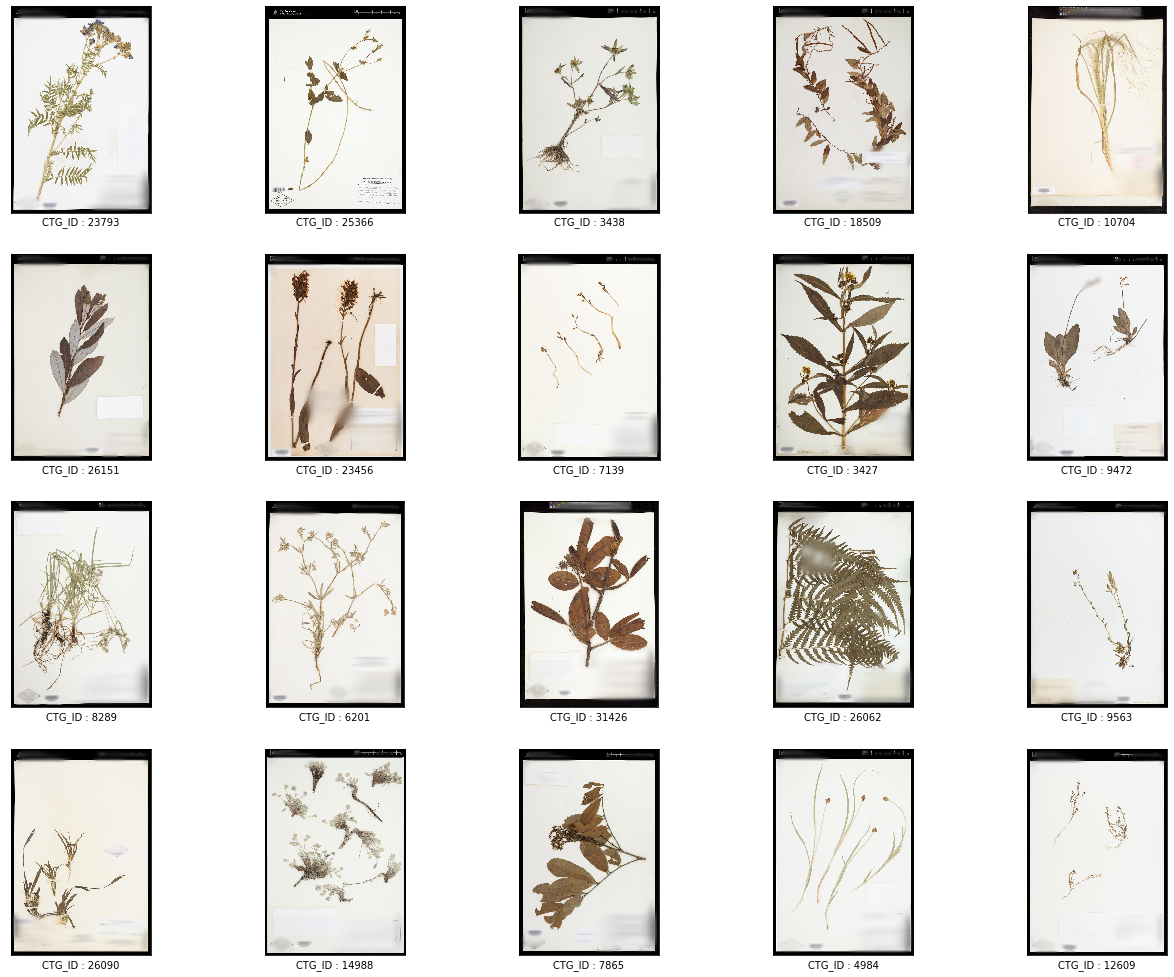

In [17]:
SIZE = 22
plt.figure(figsize=(SIZE, SIZE))
for i in range(20):
    random_sample = df_images_annotations.iloc[np.random.random_integers(i,len(df_images_annotations) - 1)]
    random_sample_img = mpimg.imread(PATH+random_sample['file_name'])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(random_sample_img, cmap=plt.cm.binary)
    plt.xlabel("CTG_ID : "+str(random_sample['category_id']))
plt.show()

In [69]:
df_sampels = df_images_annotations[['file_name', 'category_id']]
df_sampels.to_csv('sample.csv' , index=False, sep=";")
df_sampels.head(4)

,file_name,category_id
76407,images/000/00/626762.jpg,0
601590,images/000/00/72077.jpg,0
76408,images/000/00/818271.jpg,0
556748,images/000/00/495523.jpg,0


In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(list(df_sampels.file_name[0:4000]), list(df_sampels.category_id[0:4000]), test_size = 0.3, random_state = 0)

In [73]:
len(x_train),len(x_test)

(2800, 1200)

In [74]:
x_train[0], y_train[0]

('images/001/42/844758.jpg', 142)